In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Датасет Ирисы

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
class_names = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

df = pd.read_csv(url, names=names)

# Вывод распределения по классам
class_distribution = df['class'].value_counts()
print(class_distribution)

df


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Матрица корреляций и попарные распределения признаков

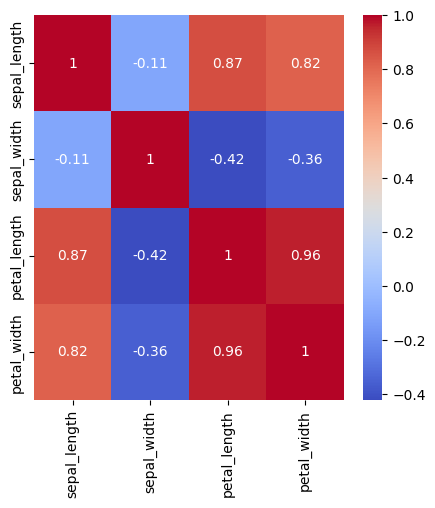

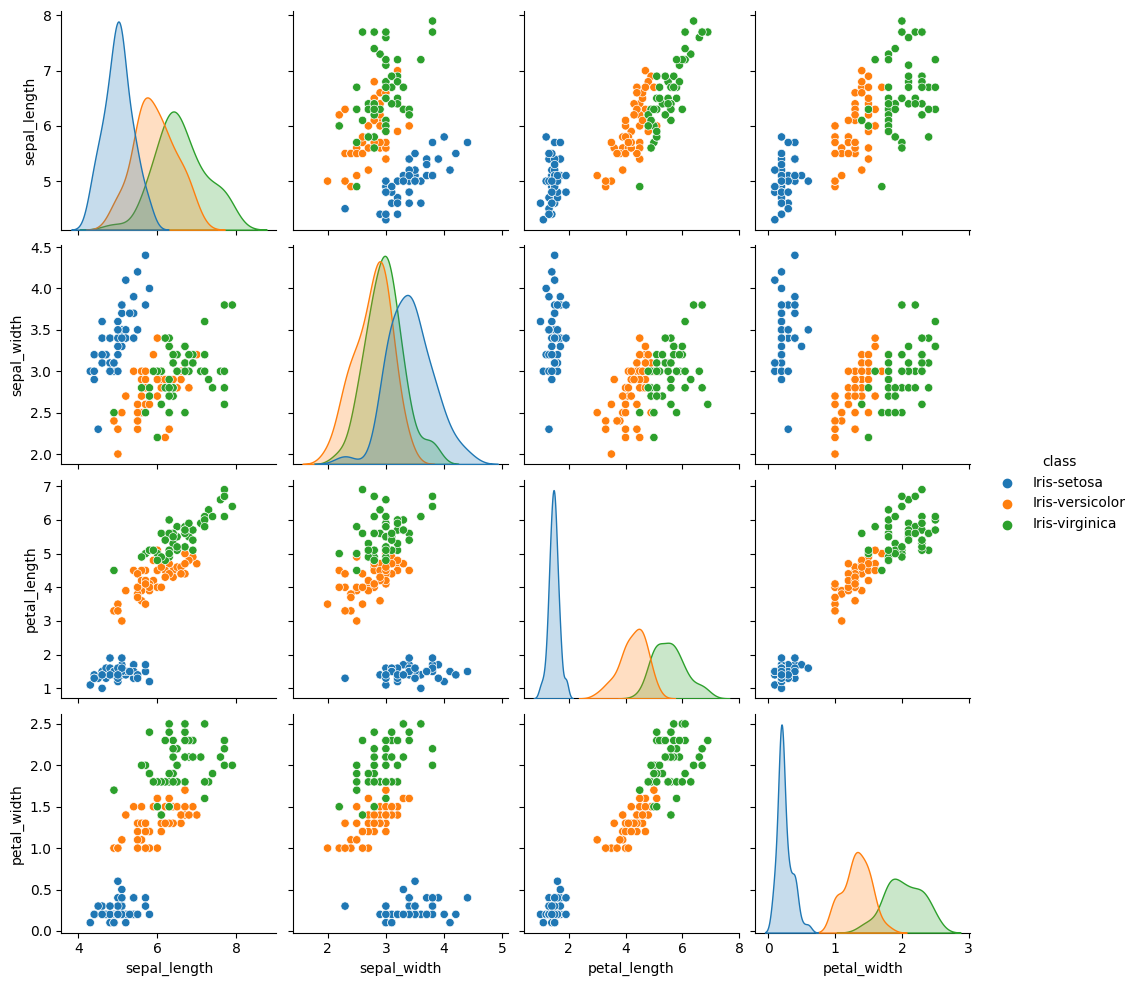

In [3]:
corr_matrix = df.corr(method='pearson', numeric_only=True)
plt.figure(figsize=(5, 5))  # Установите размер 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm') # Тепловая карта
sns.pairplot(df, hue='class')
plt.show()

### Дерево решений

Визуализация дерева решений на всех парах признаков

In [4]:
from matplotlib.colors import ListedColormap

# Функция для визуализации
def plot_decision_regions(X, y, classifier, encoder, resolution=0.02):
    # Настройка генератора маркеров и палитры
    markers = ('s', 'x', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Вывод поверхности решения
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)

    # Вывод образцов классов
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.7, color=cmap(idx),
                    marker=markers[idx], label=encoder.inverse_transform([cl])[0])

In [5]:
feature_pairs = []
# Список всех возможных пар признаков
for i in range(len(names) - 1):
    for j in range(i+1, len(names) - 1):
        feature_pairs.append((names[i], names[j]))
feature_pairs

[('sepal_length', 'sepal_width'),
 ('sepal_length', 'petal_length'),
 ('sepal_length', 'petal_width'),
 ('sepal_width', 'petal_length'),
 ('sepal_width', 'petal_width'),
 ('petal_length', 'petal_width')]

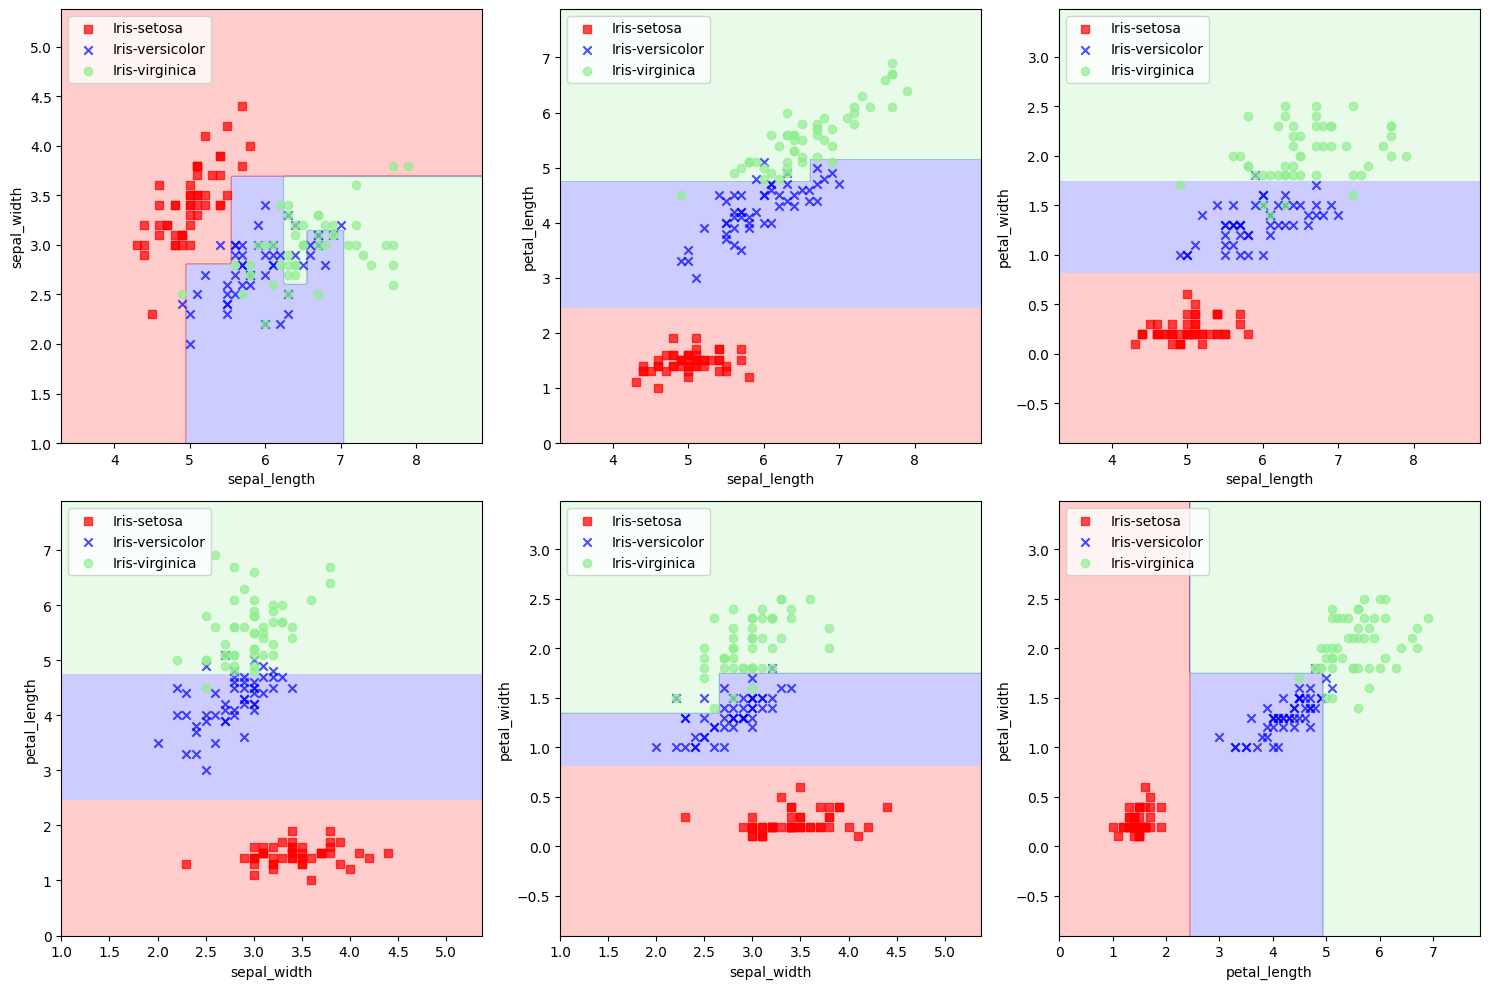

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Создание объекта LabelEncoder
le = LabelEncoder()

# Преобразование меток классов в числа
y = le.fit_transform(df['class'].values)

# Создание фигуры для подграфиков
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Обучение классификатора и визуализация областей решения для каждой пары признаков
for i, pair in enumerate(feature_pairs):
    X = df[list(pair)].values
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split = 10, min_samples_leaf=3, random_state=42)
    clf.fit(X, y)
    
    # Выбор текущего подграфика
    ax = axs[i//3, i%3]
    plt.sca(ax)
    
    # Вывод областей решения на текущем подграфике
    plot_decision_regions(X, y, classifier=clf, encoder=le)
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.legend(loc='upper left')

# Отображение фигуры с подграфиками
plt.tight_layout()
plt.show()


#### Валидация

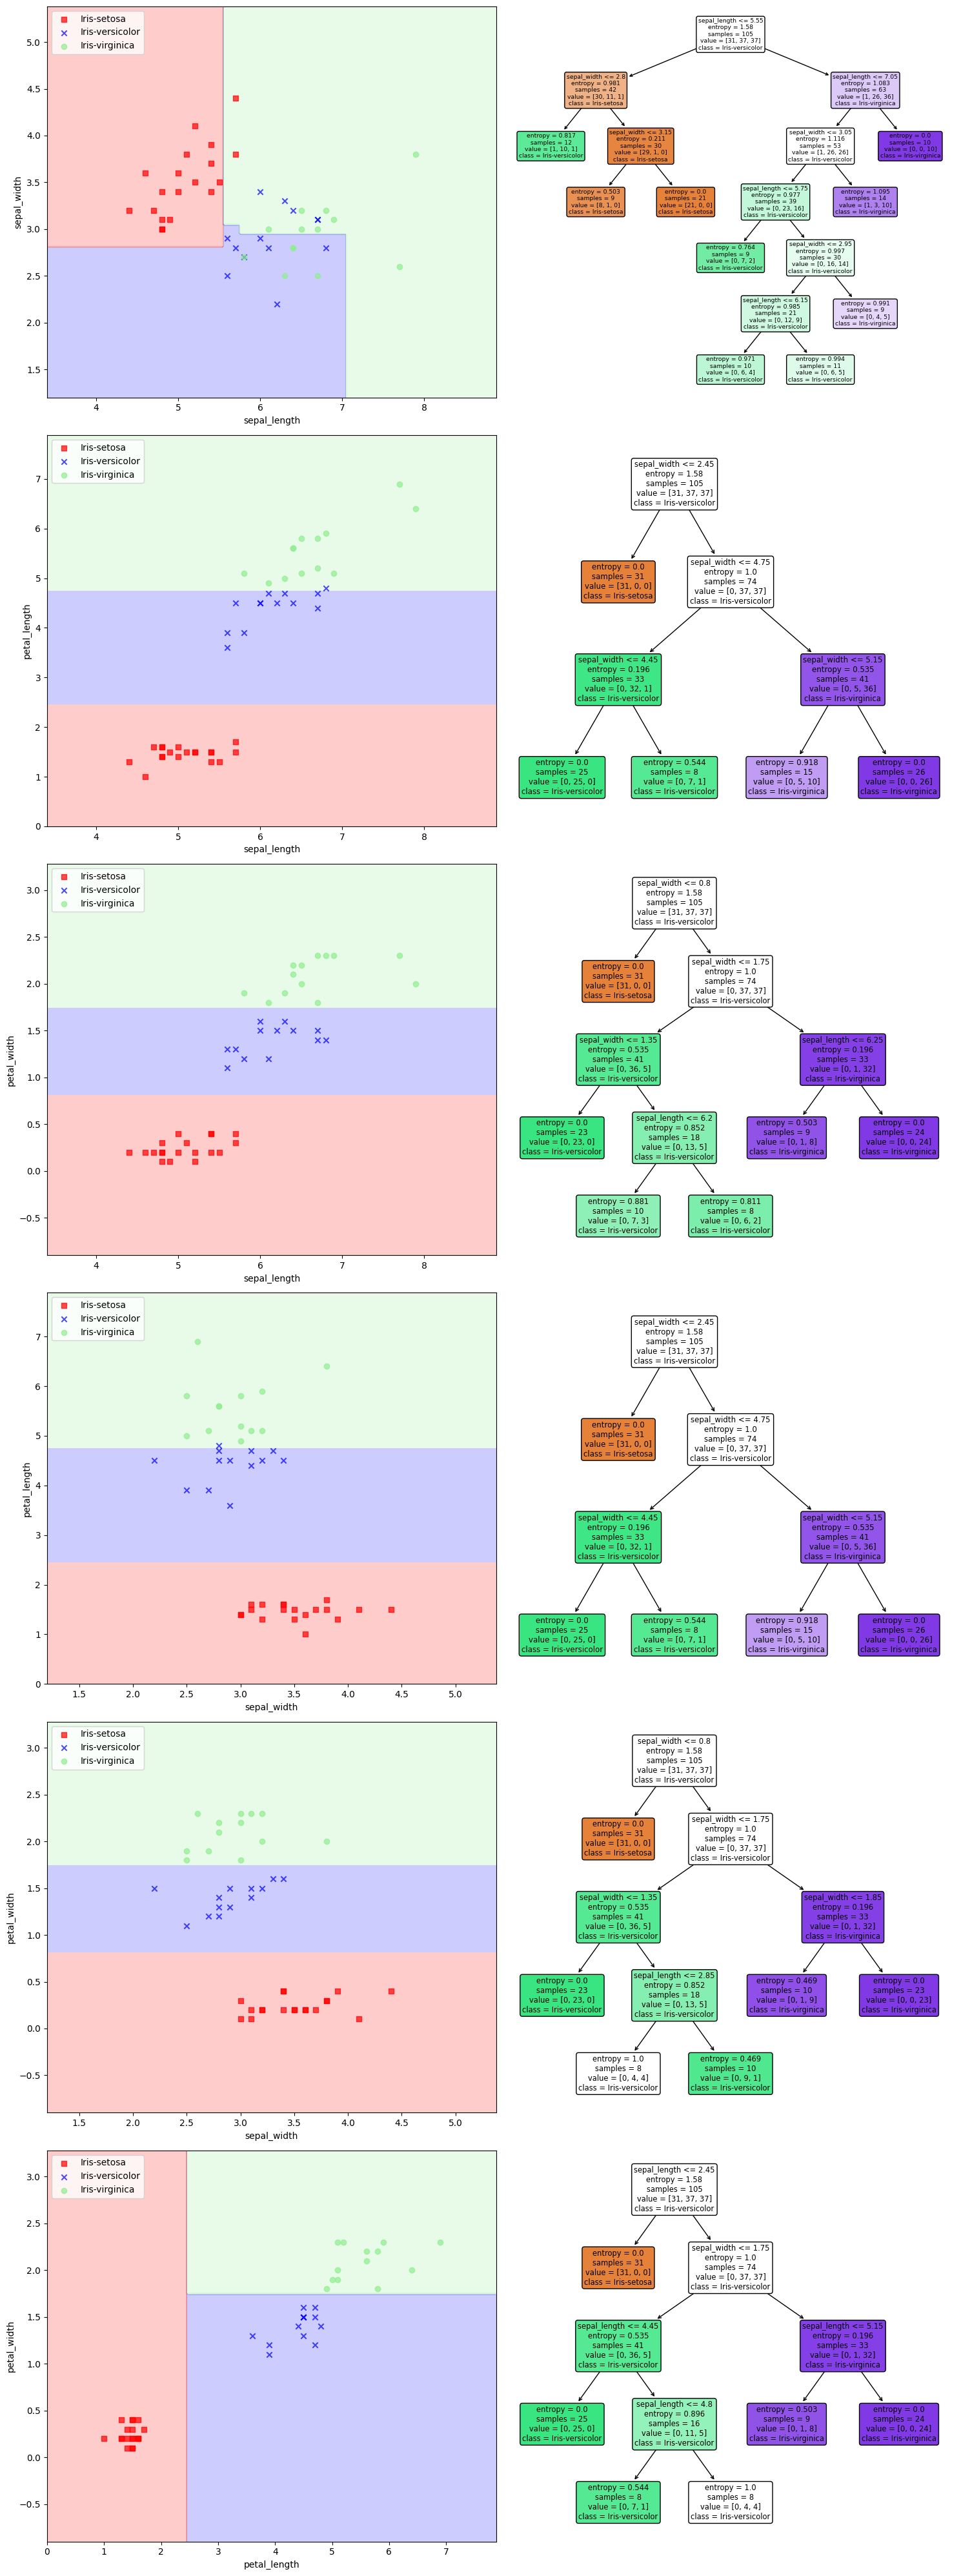

In [7]:
# Создание фигуры для подграфиков
fig, axs = plt.subplots(len(feature_pairs), 2, figsize=(15, 40))

# Обучение классификатора и визуализация областей решения для каждой пары признаков
for i, pair in enumerate(feature_pairs):
    X = df[list(pair)].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split = 10, min_samples_leaf=8, random_state=42)
    clf.fit(X_train, y_train)
    
    # Выбор текущего подграфика для областей решения
    ax = axs[i, 0]
    plt.sca(ax)
    
    # Вывод областей решения на текущем подграфике
    plot_decision_regions(X_test, y_test, classifier=clf, encoder=le)
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.legend(loc='upper left')
    
    # Выбор текущего подграфика для дерева решений
    ax = axs[i, 1]
    plt.sca(ax)
    
    # Вывод дерева решений на текущем подграфике
    plot_tree(clf, 
          filled=True, 
          rounded=True, 
          class_names=class_names,
          feature_names=df.drop("class", axis=1).columns)

# Отображение фигуры с подграфиками
plt.tight_layout()
plt.show()


#### Вывод дерева и метрик

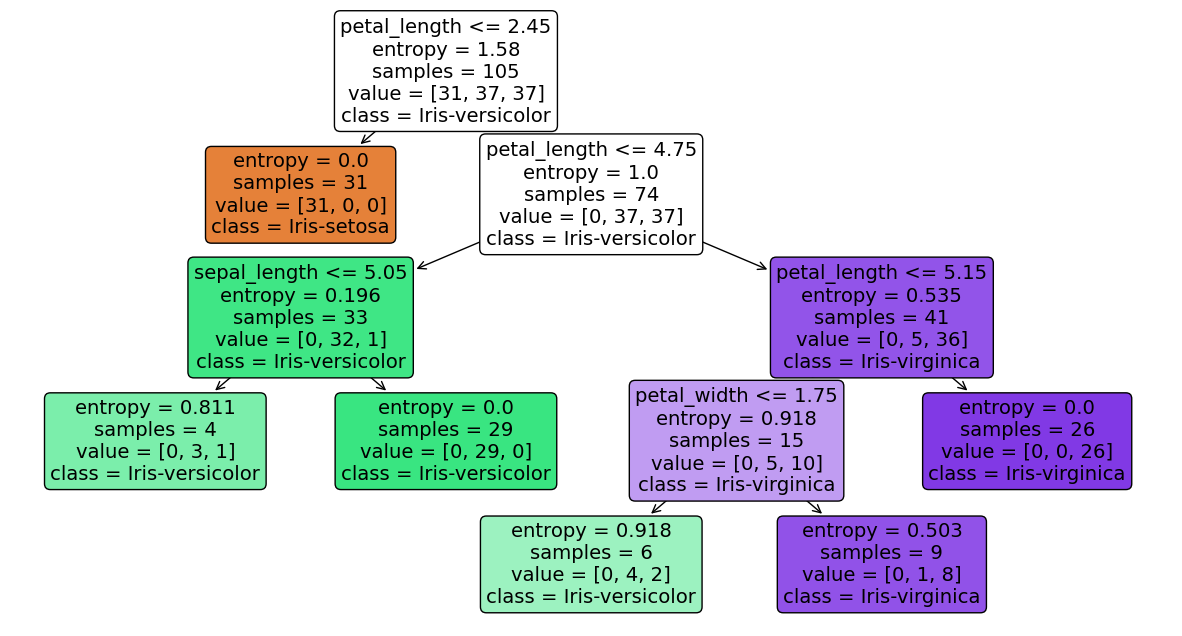

In [8]:
X = df.drop(columns=['class']).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split = 10, min_samples_leaf=3, random_state=42)

model = clf.fit(X_train, y_train)

plt.figure(figsize=(15,8))
plot_tree(clf, 
          filled=True, 
          rounded=True, 
          class_names=class_names,
          feature_names=df.drop("class", axis=1).columns)
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



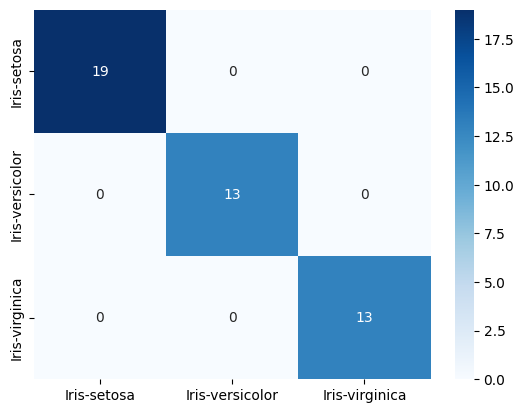

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
print(classification_report(y_test, y_pred))

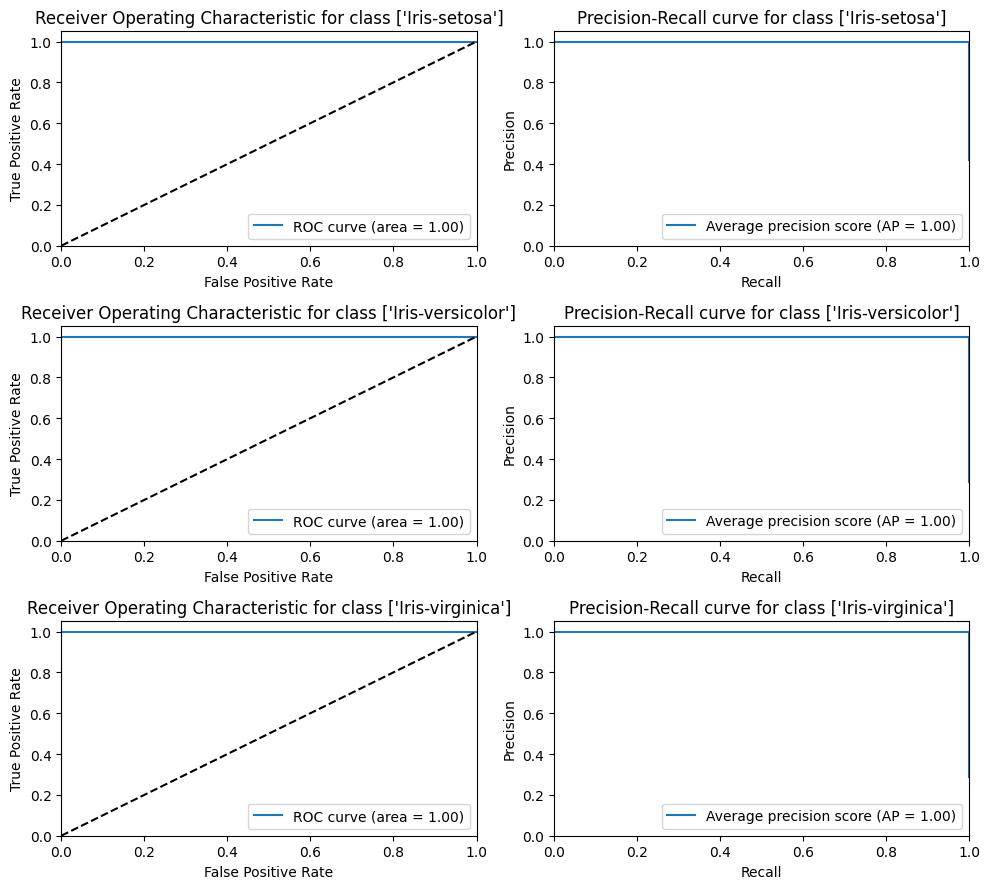

In [10]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the output
y_bin = label_binarize(y_test, classes=np.unique(y_test))

# Learn to predict each class against the other
y_score = clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute Precision-Recall and plot curve for each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_bin[:, i], y_score[:, i])

# Создание фигуры для подграфиков
fig, axs = plt.subplots(n_classes, 2, figsize=(10, 3*n_classes))

for i in range(n_classes):
    # Выбор текущего подграфика для ROC
    ax = axs[i, 0]
    plt.sca(ax)
    
    # Вывод ROC кривой на текущем подграфике
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for class %s' % le.inverse_transform([i]))
    plt.legend(loc="lower right")
    
    # Выбор текущего подграфика для PR
    ax = axs[i, 1]
    plt.sca(ax)
    
    # Вывод PR кривой на текущем подграфике
    plt.step(recall[i], precision[i], where='post', label='Average precision score (AP = %0.2f)' % average_precision[i])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve for class %s' % le.inverse_transform([i]))
    plt.legend(loc="lower right")

# Отображение фигуры с подграфиками
plt.tight_layout()
plt.show()



### Градиентный бустинг

Визуализация дерева решений на всех парах признаков

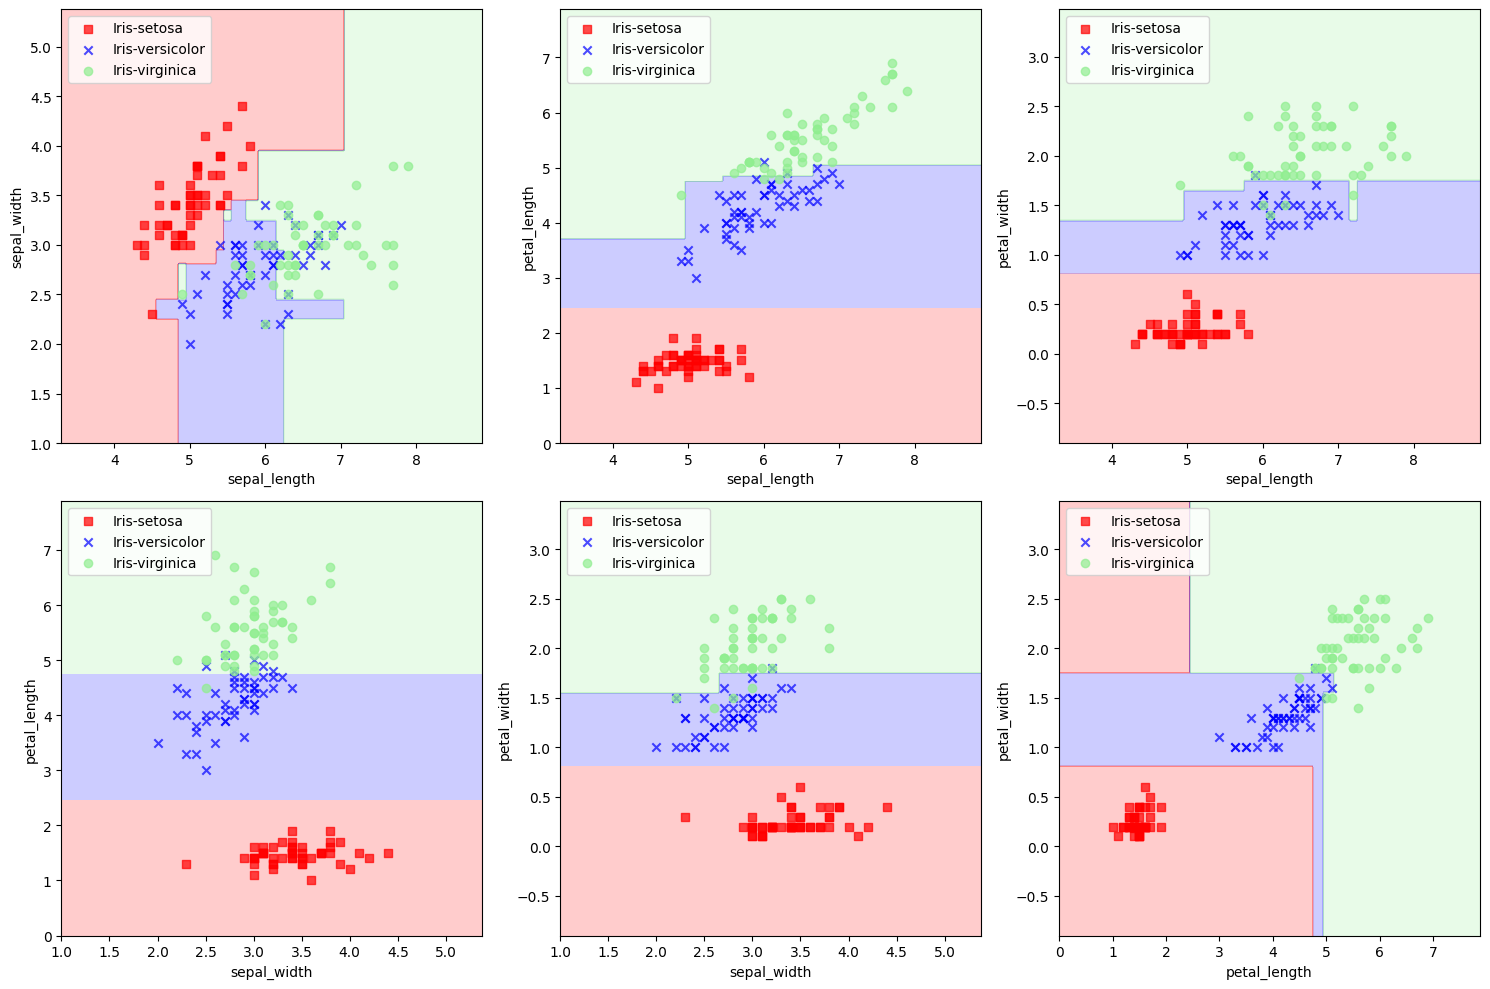

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

# Создание фигуры для подграфиков
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Обучение классификатора и визуализация областей решения для каждой пары признаков
for i, pair in enumerate(feature_pairs):
    X = df[list(pair)].values
    clf = GradientBoostingClassifier(n_estimators=3, learning_rate=1.0, max_depth=2, min_samples_leaf=3, random_state=42)
    clf.fit(X, y)
    
    # Выбор текущего подграфика
    ax = axs[i//3, i%3]
    plt.sca(ax)
    
    # Вывод областей решения на текущем подграфике
    plot_decision_regions(X, y, classifier=clf, encoder=le)
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.legend(loc='upper left')

# Отображение фигуры с подграфиками
plt.tight_layout()
plt.show()

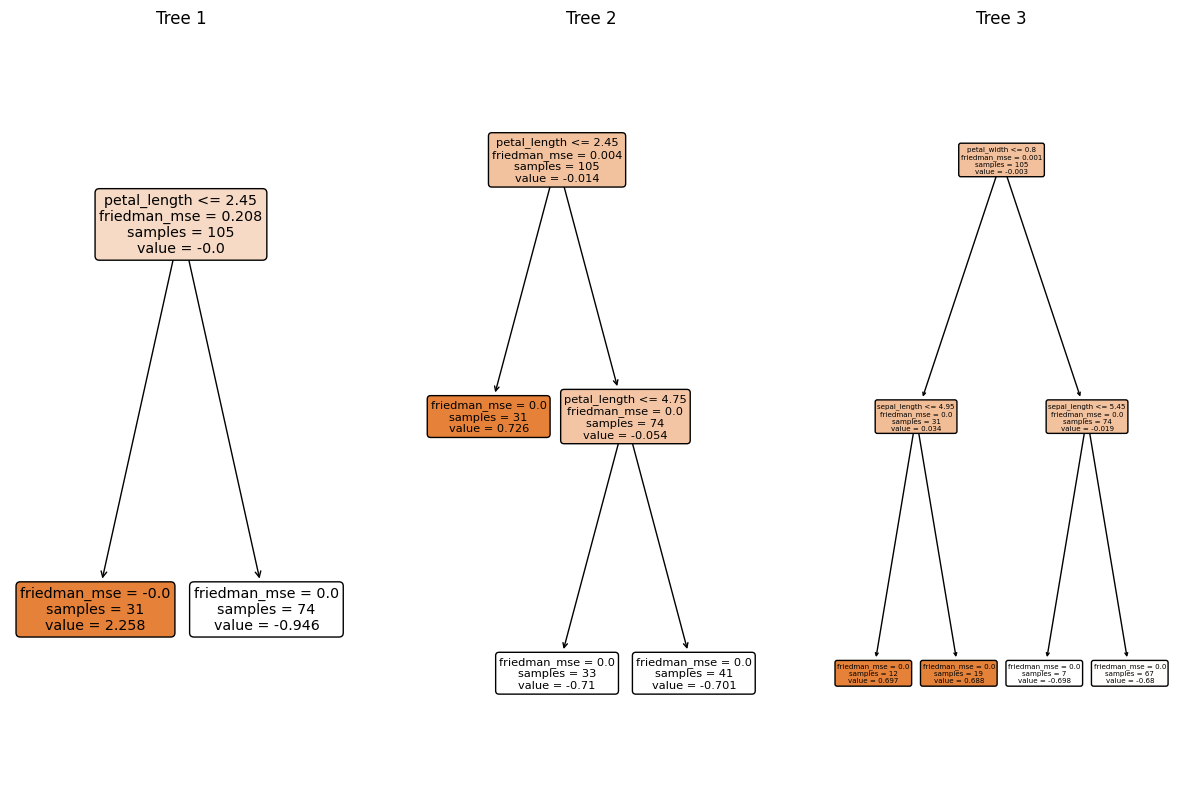

In [12]:
# Создание модели градиентного бустинга
clf = GradientBoostingClassifier(n_estimators=3, learning_rate=1.0, max_depth=2, min_samples_leaf=3, random_state=42)
clf.fit(X_train, y_train)

# Создание фигуры для подграфиков
fig, axs = plt.subplots(1, 3, figsize=(15, 10))

# Визуализация деревьев
for i, est in enumerate(clf.estimators_):
    plt.sca(axs[i])
    tree.plot_tree(est[0],
          filled=True, 
          rounded=True, 
          class_names=class_names,
          feature_names=df.drop("class", axis=1).columns)
    plt.title(f"Tree {i+1}")
plt.show()


Версия на пнях

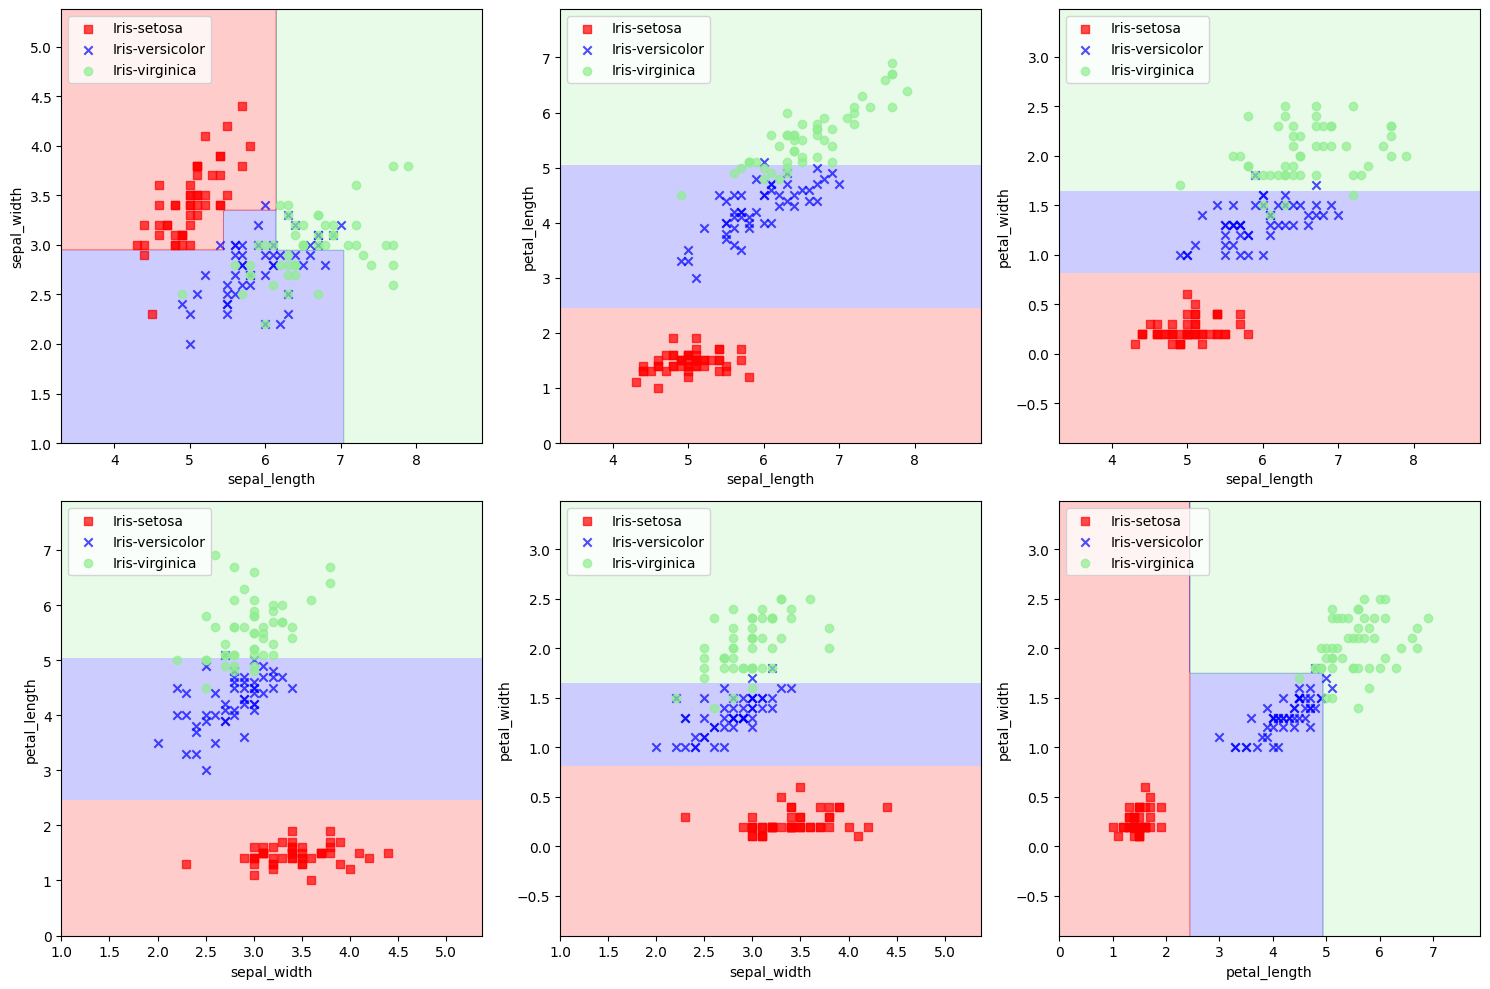

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

# Создание фигуры для подграфиков
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Обучение классификатора и визуализация областей решения для каждой пары признаков
for i, pair in enumerate(feature_pairs):
    X = df[list(pair)].values
    clf = GradientBoostingClassifier(n_estimators=2, learning_rate=1.0, max_depth=1, min_samples_leaf=3, random_state=42)
    clf.fit(X, y)
    
    # Выбор текущего подграфика
    ax = axs[i//3, i%3]
    plt.sca(ax)
    
    # Вывод областей решения на текущем подграфике
    plot_decision_regions(X, y, classifier=clf, encoder=le)
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.legend(loc='upper left')

# Отображение фигуры с подграфиками
plt.tight_layout()
plt.show()

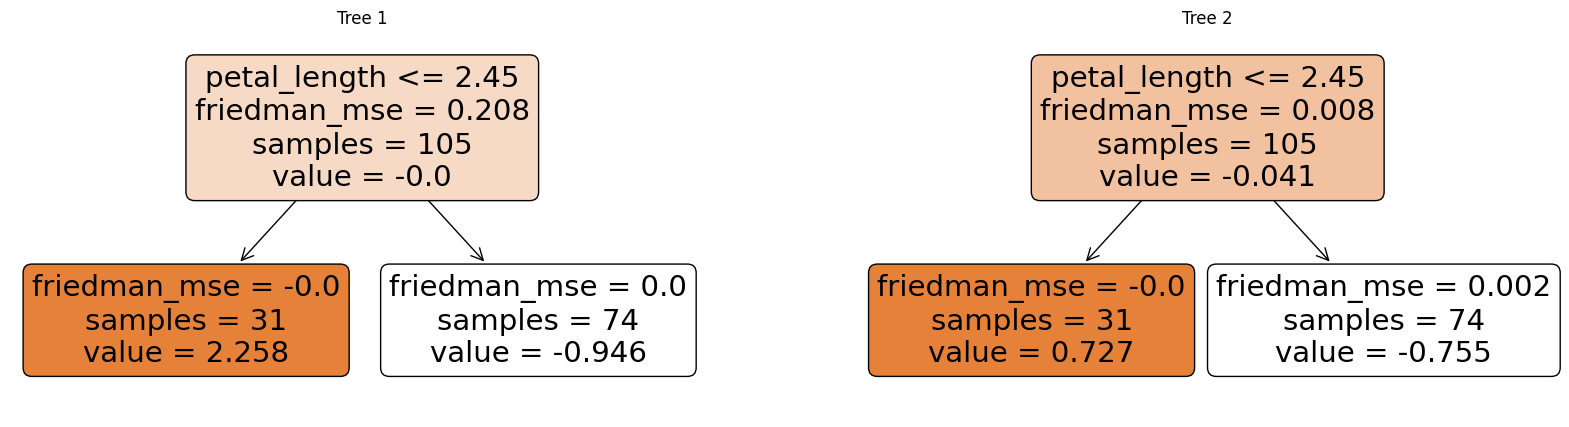

In [14]:
X = df.drop(columns=['class']).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = GradientBoostingClassifier(n_estimators=2, learning_rate=1.0, max_depth=1, random_state=42)

clf.fit(X_train, y_train)

# Создание фигуры для подграфиков
fig, axs = plt.subplots(1, len(clf.estimators_), figsize=(20, 5))

# Визуализация деревьев
for i, est in enumerate(clf.estimators_):
    plt.sca(axs[i])
    tree.plot_tree(est[0],
          filled=True, 
          rounded=True, 
          class_names=class_names,
          feature_names=df.drop("class", axis=1).columns)
    plt.title(f"Tree {i+1}")
plt.show()


Метрики

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



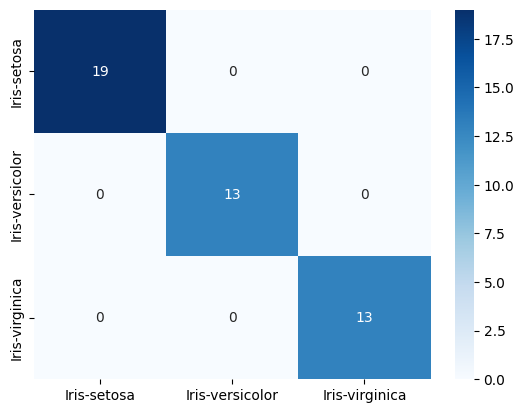

In [15]:
y_pred = clf.predict(X_test)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
print(classification_report(y_test, y_pred))

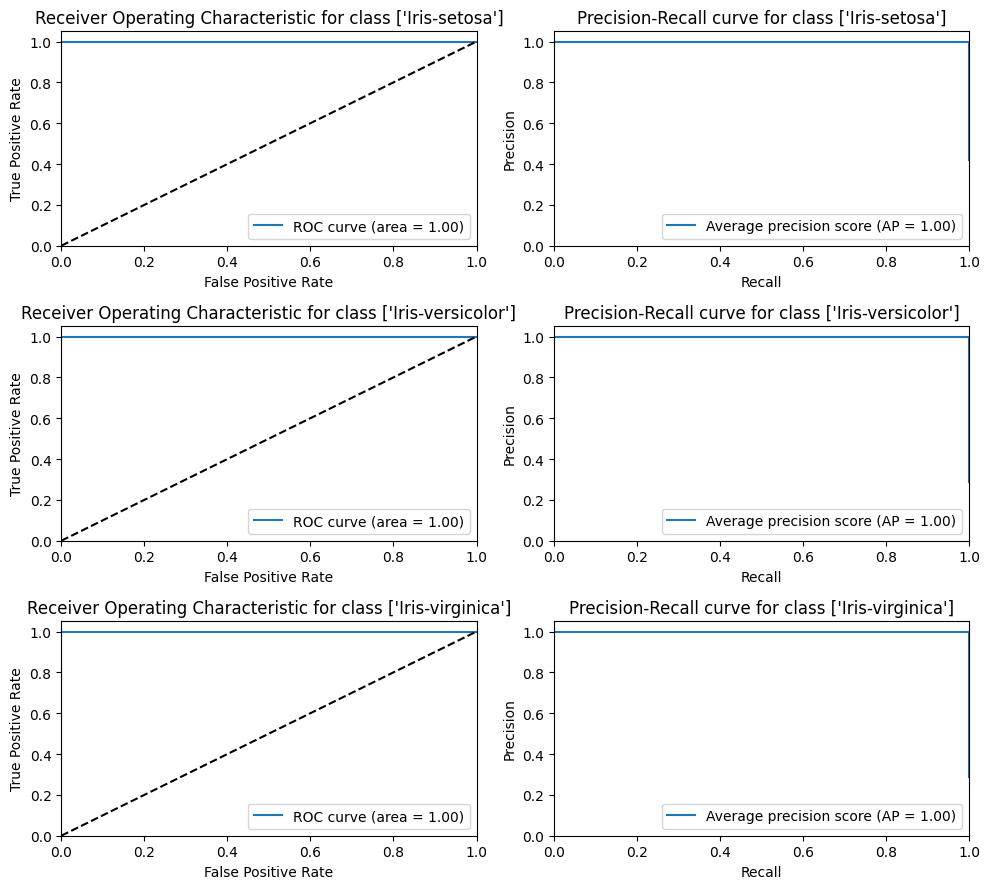

In [16]:
# Learn to predict each class against the other
y_score = clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute Precision-Recall and plot curve for each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_bin[:, i], y_score[:, i])

# Создание фигуры для подграфиков
fig, axs = plt.subplots(n_classes, 2, figsize=(10, 3*n_classes))

for i in range(n_classes):
    # Выбор текущего подграфика для ROC
    ax = axs[i, 0]
    plt.sca(ax)
    
    # Вывод ROC кривой на текущем подграфике
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for class %s' % le.inverse_transform([i]))
    plt.legend(loc="lower right")
    
    # Выбор текущего подграфика для PR
    ax = axs[i, 1]
    plt.sca(ax)
    
    # Вывод PR кривой на текущем подграфике
    plt.step(recall[i], precision[i], where='post', label='Average precision score (AP = %0.2f)' % average_precision[i])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve for class %s' % le.inverse_transform([i]))
    plt.legend(loc="lower right")

# Отображение фигуры с подграфиками
plt.tight_layout()
plt.show()


Значимость признаков

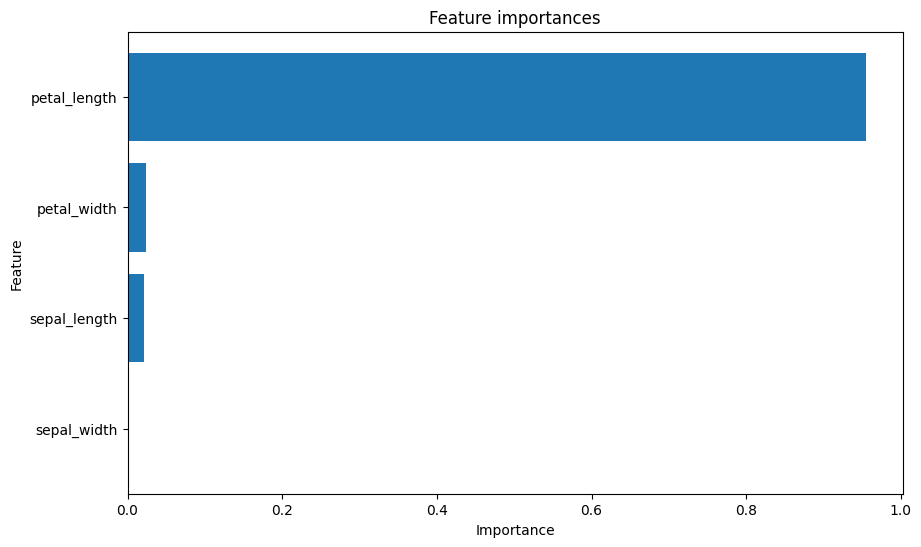

In [17]:
# Вычисление значимости переменных
feature_importance = model.feature_importances_

# Создание DataFrame для удобства визуализации
importance_df = pd.DataFrame({
    'Feature': df.columns[:-1],
    'Importance': feature_importance
})

# Сортировка DataFrame по значимости
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Визуализация значимости переменных
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature importances")
plt.gca().invert_yaxis()  # инвертирование оси y для лучшего отображения
plt.show()


Зависимость качества решения (на обучении и скользящем контроле) от числа вершин дерева.

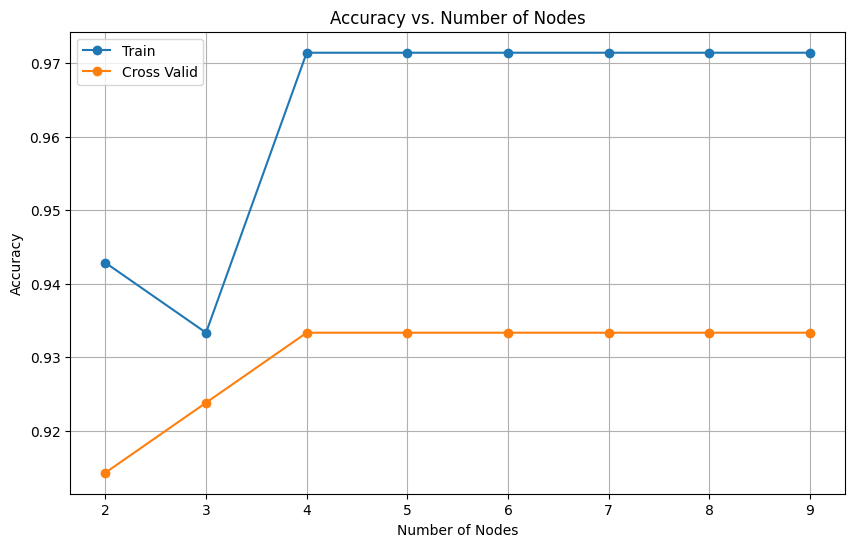

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Список для хранения результатов
train_scores = []
cv_scores = []

# Диапазон числа вершин
num_nodes = range(2, 10)

for nodes in num_nodes:
    model = GradientBoostingClassifier(n_estimators=3, max_leaf_nodes=nodes, random_state=42)
    model.fit(X_train, y_train)
    
    # Оценка качества на обучающем наборе
    train_score = accuracy_score(y_train, model.predict(X_train))
    train_scores.append(train_score)
    
    # Оценка качества на скользящем контроле
    cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()
    cv_scores.append(cv_score)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(num_nodes, train_scores, marker='o', label='Train')
plt.plot(num_nodes, cv_scores, marker='o', label='Cross Valid')
plt.xlabel('Number of Nodes')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Nodes')
plt.legend()
plt.grid(True)
plt.show()


[Градиентный бустинг] Зависимость качества решения (на обучении и скользящем контроле) от числа деревьев.

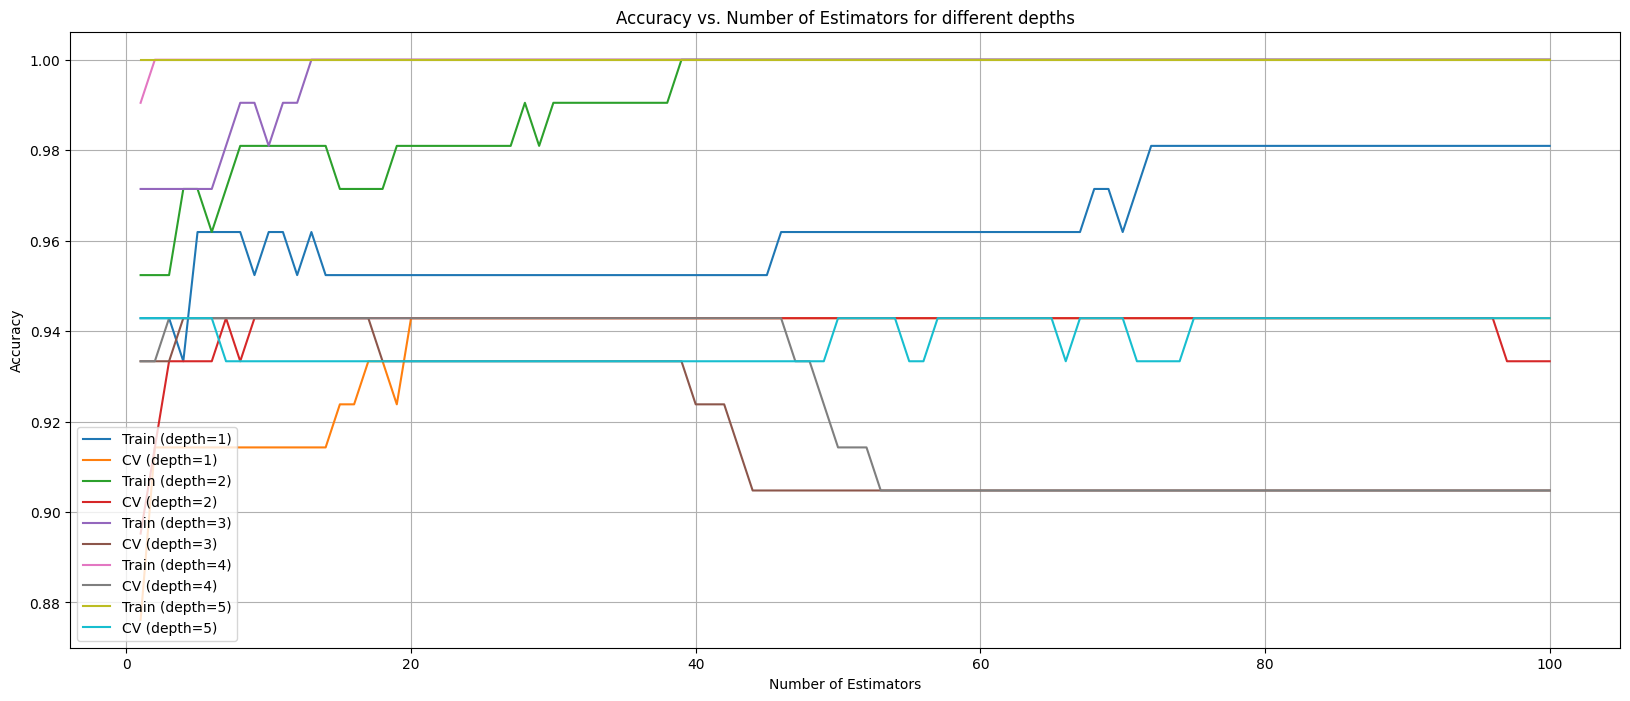

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Диапазон числа деревьев и глубины
num_estimators = range(1, 101)
depths = range(1, 6)

# Построение графика
plt.figure(figsize=(20, 8))

for depth in depths:
    train_scores = []
    cv_scores = []

    for estimators in num_estimators:
        model = GradientBoostingClassifier(n_estimators=estimators, max_depth=depth, random_state=42)
        model.fit(X_train, y_train)

        # Оценка качества на обучающем наборе
        train_score = accuracy_score(y_train, model.predict(X_train))
        train_scores.append(train_score)

        # Оценка качества на скользящем контроле
        cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()
        cv_scores.append(cv_score)

    plt.plot(num_estimators, train_scores, label=f'Train (depth={depth})')
    plt.plot(num_estimators, cv_scores, label=f'CV (depth={depth})')

plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Estimators for different depths')
plt.legend()
plt.grid(True)
plt.show()


[Случайный лес] Зависимость качества решения (на обучении и скользящем контроле) от числа деревьев.

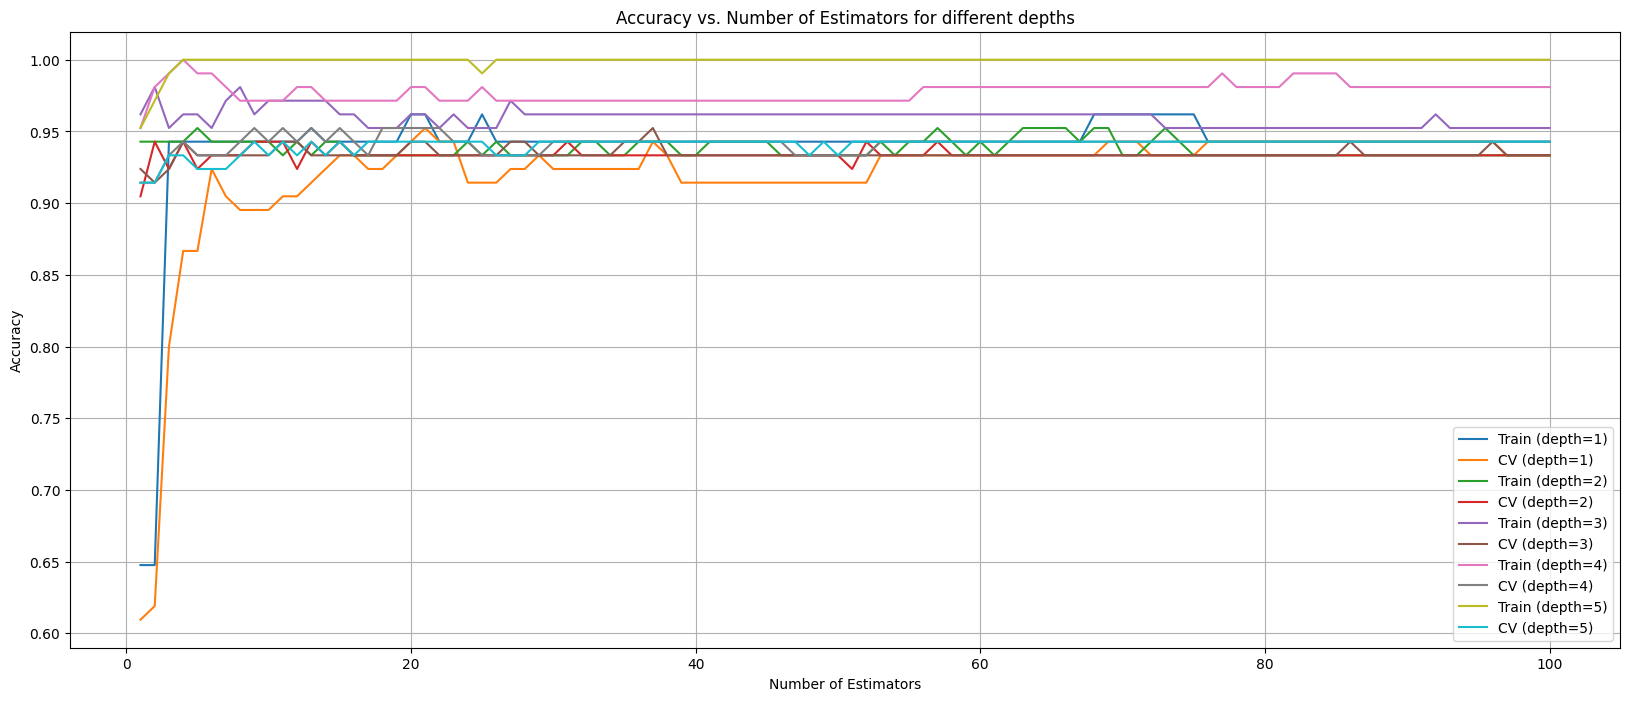

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
# Диапазон числа деревьев и глубины
num_estimators = range(1, 101)
depths = range(1, 6)

# Построение графика
plt.figure(figsize=(20, 8))

for depth in depths:
    train_scores = []
    cv_scores = []

    for estimators in num_estimators:
        model = RandomForestClassifier(n_estimators=estimators, max_depth=depth, random_state=42)
        model.fit(X_train, y_train)

        # Оценка качества на обучающем наборе
        train_score = accuracy_score(y_train, model.predict(X_train))
        train_scores.append(train_score)

        # Оценка качества на скользящем контроле
        cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()
        cv_scores.append(cv_score)

    plt.plot(num_estimators, train_scores, label=f'Train (depth={depth})')
    plt.plot(num_estimators, cv_scores, label=f'CV (depth={depth})')

plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Estimators for different depths')
plt.legend()
plt.grid(True)
plt.show()
